# Tools used to compare the global temperature against my local city(Patna)

### I used SQL command to extract the data from the datasource and imported it as csv files

### To check the nearest city I viewed the city_list table:
SELECT CITY FROM CITY_LIST WHERE COUNTRY LIKE 'India';

### To extract the global data i used the following command:
SELECT * FROM global_data;

### To extract the local data i used the following command:
SELECT * FROM CITY_DATA WHERE CITY LIKE 'Patna';


# Importing all the necessary libraries 

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

%matplotlib inline
%config InlineBackend.figureformat='retina'

## Reading local and global data from excelsheet using pandas

In [194]:
local_temp = pd.read_csv('results.csv')
global_temp = pd.read_csv('global_data.csv')

#### Displaying the data

In [195]:
local_temp.drop('MOVING_AVG',axis=1,inplace=True)

In [196]:
global_temp.drop('MOVING_AVG',axis=1,inplace=True)

In [197]:
local_temp.head()

,year,city,country,avg_temp
0,1796,Patna,India,24.99
1,1797,Patna,India,26.49
2,1798,Patna,India,24.27
3,1799,Patna,India,25.25
4,1800,Patna,India,25.20


In [198]:
global_temp.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


### Calculating the moving average for both the data sets using window of 10, 15 and 20 days

In [199]:
local_temp['MOVING_AVG_5'] = local_temp['avg_temp'].rolling(5).mean()
local_temp['MOVING_AVG_10'] = local_temp['avg_temp'].rolling(10).mean()
local_temp['MOVING_AVG_15'] = local_temp['avg_temp'].rolling(15).mean()

In [200]:
global_temp['MOVING_AVG_5'] = global_temp['avg_temp'].rolling(5).mean()
global_temp['MOVING_AVG_10'] = global_temp['avg_temp'].rolling(10).mean()
global_temp['MOVING_AVG_15'] = global_temp['avg_temp'].rolling(15).mean()

In [201]:
local_temp


,year,city,country,avg_temp,MOVING_AVG_5,MOVING_AVG_10,MOVING_AVG_15
0,1796,Patna,India,24.99,NaN,NaN,NaN
1,1797,Patna,India,26.49,NaN,NaN,NaN
2,1798,Patna,India,24.27,NaN,NaN,NaN
3,1799,Patna,India,25.25,NaN,NaN,NaN
4,1800,Patna,India,25.20,25.240,NaN,NaN
...,...,...,...,...,...,...,...
213,2009,Patna,India,26.31,25.940,25.868,25.832667
214,2010,Patna,India,26.54,26.026,25.964,25.884667
215,2011,Patna,India,25.48,25.896,25.930,25.866667
216,2012,Patna,India,25.98,25.974,25.922,25.901333


In [202]:
global_temp

,year,avg_temp,MOVING_AVG_5,MOVING_AVG_10,MOVING_AVG_15
0,1750,8.72,NaN,NaN,NaN
1,1751,7.98,NaN,NaN,NaN
2,1752,5.78,NaN,NaN,NaN
3,1753,8.39,NaN,NaN,NaN
4,1754,8.47,7.868,NaN,NaN
...,...,...,...,...,...
261,2011,9.52,9.578,9.554,9.477333
262,2012,9.51,9.534,9.548,9.498000
263,2013,9.61,9.570,9.556,9.504000
264,2014,9.57,9.582,9.581,9.522667


### Replacing all the nan values in both the datasets using backfill padding
#### Before that we check the number of nan values

In [203]:
local_temp.isna().sum()

year              0
city              0
country           0
avg_temp          8
MOVING_AVG_5     20
MOVING_AVG_10    35
MOVING_AVG_15    48
dtype: int64

In [204]:
global_temp.isna().sum()

year              0
avg_temp          0
MOVING_AVG_5      4
MOVING_AVG_10     9
MOVING_AVG_15    14
dtype: int64

In [205]:
local_temp.fillna(method='backfill',inplace=True,axis=0)

In [206]:
global_temp.fillna(method='backfill',inplace=True,axis=0)

In [207]:
local_temp.isna().sum().sum()

0

In [208]:
global_temp.isna().sum().sum()

0

### Plotting the curves of year vs moving average in both three cases of moving average(5, 10, 15) on different graphs
##### I have limited the year in the range from 1795 till 2015 because my city, Patna, data was available 1796 onwards. I took this step for a better visualization

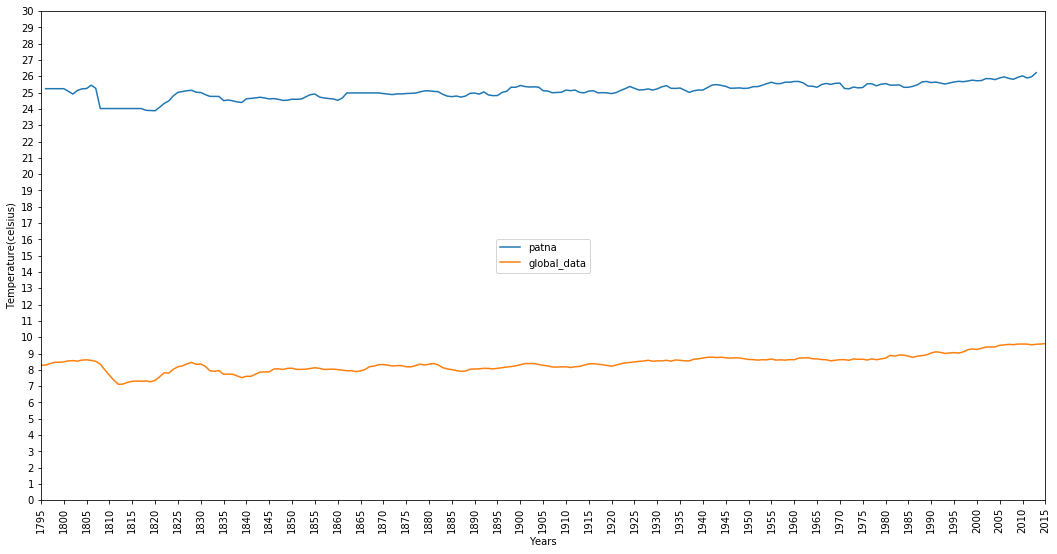

In [209]:
figure = plt.figure(figsize=(18,9))
plt.plot(local_temp['year'],local_temp['MOVING_AVG_5'], label='patna')
plt.plot(global_temp['year'],global_temp['MOVING_AVG_5'],label='global_data')
plt.legend(loc ='center')
plt.xlabel('Years')
plt.ylabel('Temperature(celsius)')
plt.xticks(np.arange(1750,2020,5),rotation=90)
plt.yticks(np.arange(0,31,1))
plt.xlim(1795,2015)
plt.show()


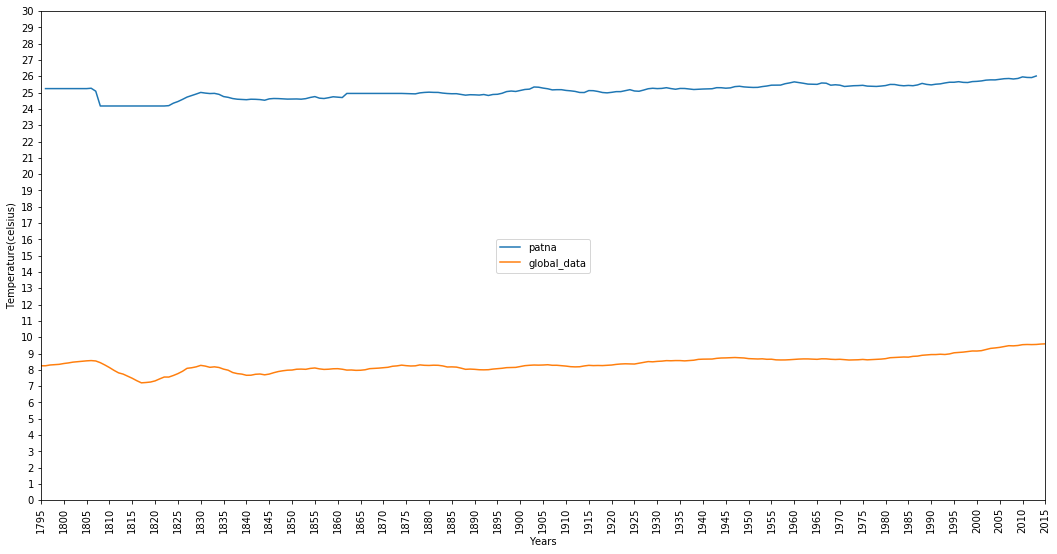

In [210]:
figure = plt.figure(figsize=(18,9))
plt.plot(local_temp['year'],local_temp['MOVING_AVG_10'], label='patna')
plt.plot(global_temp['year'],global_temp['MOVING_AVG_10'],label='global_data')
plt.legend(loc ='center')
plt.xlabel('Years')
plt.ylabel('Temperature(celsius)')
plt.xticks(np.arange(1750,2020,5),rotation=90)
plt.yticks(np.arange(0,31,1))
plt.xlim(1795,2015)
plt.show()



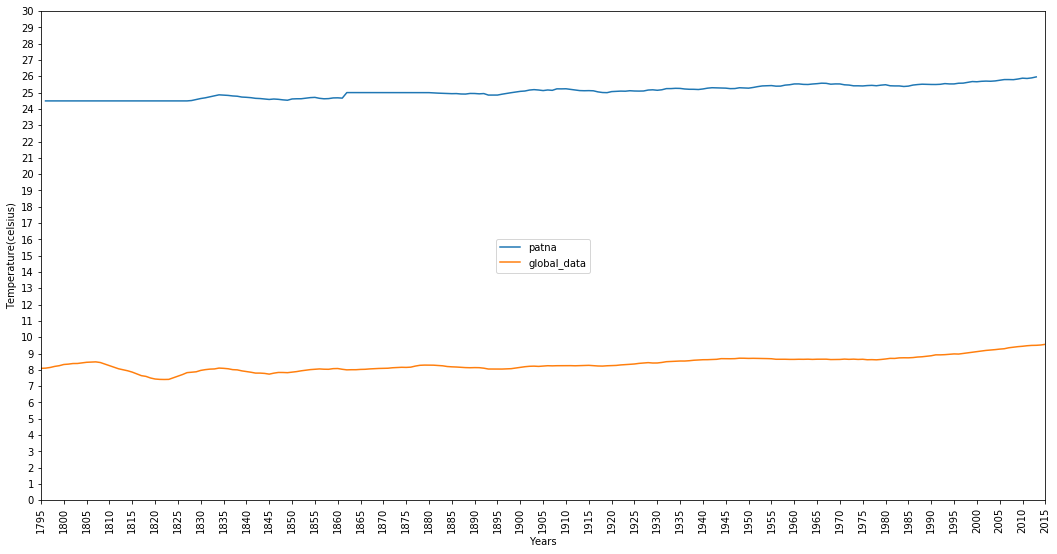

In [211]:
figure = plt.figure(figsize=(18,9))
plt.plot(local_temp['year'],local_temp['MOVING_AVG_15'], label='patna')
plt.plot(global_temp['year'],global_temp['MOVING_AVG_15'],label='global_data')
plt.legend(loc ='center')
plt.xlabel('Years')
plt.ylabel('Temperature(celsius)')
plt.xticks(np.arange(1750,2020,5),rotation=90)
plt.yticks(np.arange(0,31,1))
plt.xlim(1795,2015)
plt.show()



# OBSERVATIONS

 - Patna city is hotter than global temperature in the years ranging from 1796 to 2015(clearly shown in the graphs).
 - The difference in the moving average temperature trend seems to be constant throughout the given period.
 - The local(Patna) as well the global temperatures are increasing in the given period.
 - From the visual it is clear that their is more fluctuation in the moving average tempertaure of local city than the global average. 
 - Eventhough there is a drop in global temperture(moving average), the local temperature tends to increase constantly. 